In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\HP\Downloads\Creditcard_data.csv')

print(data.head(10))


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5     2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6     4  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7     7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8     7 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9     9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [2]:
# Count the number of values of class 0 and class 1
data["Class"].value_counts()

Class
0    763
1      9
Name: count, dtype: int64

In [3]:
# Seperate data into two different classes as number of values having class 0 is very high as compared to class 1
data_0 = data[data['Class'] == 0]
data_1 = data[data['Class'] == 1]
print('class 0:', data_0.shape)
print('class 1:', data_1.shape)

class 0: (763, 31)
class 1: (9, 31)


<Axes: title={'center': 'Target Variable Distribution'}, xlabel='Class'>

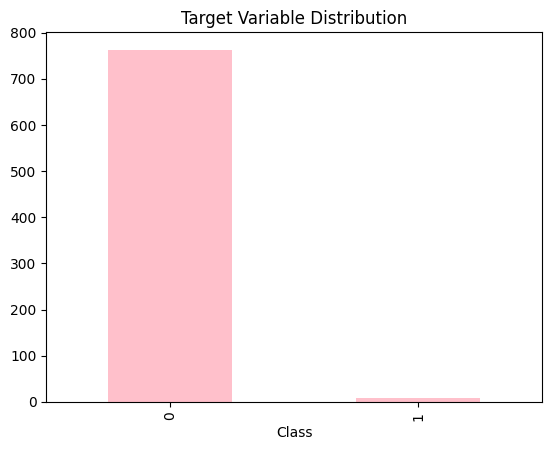

In [18]:
# plot a bar graph for target variable
data['Class'].value_counts().plot(kind='bar', color='pink', title="Target Variable Distribution")

In [5]:
# using smote algorithm for imbalance dataset
from imblearn.over_sampling import SMOTE
from collections import Counter

y = data['Class']
x = data.drop('Class', axis=1)

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

print('Original ', Counter(y))
print('Resample ', Counter(y_smote))

Original  Counter({0: 763, 1: 9})
Resample  Counter({0: 763, 1: 763})


In [6]:
# after balancing, the new dataset 
import pandas as pd

balanced_data = pd.concat([pd.DataFrame(x_smote), pd.DataFrame(y_smote, columns=['Class'])], axis=1)

print(balanced_data.head())
print(balanced_data['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Simple Random Sampling
sample1 = balanced_data.iloc[np.random.choice(len(balanced_data), size=int(0.2 * len(balanced_data)), replace=False)]

In [8]:

# 2. Stratified Sampling
strata = balanced_data.groupby('Class')
sample2 = strata.apply(lambda x: x.sample(int(0.2 * len(x)), random_state=2)).reset_index(drop=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_4564\1939192684.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample2 = strata.apply(lambda x: x.sample(int(0.2 * len(x)), random_state=2)).reset_index(drop=True)


In [9]:
# 3. Systematic Sampling
k = len(balanced_data) // int(0.2 * len(balanced_data))
start = np.random.randint(0, k)
sample3 = balanced_data.iloc[start::k]

In [10]:
# 4. Cluster Sampling
num_clusters = 5
cluster_labels = np.arange(len(balanced_data)) % num_clusters
balanced_data['Cluster'] = cluster_labels
selected_cluster = np.random.choice(num_clusters)
sample4 = balanced_data[balanced_data['Cluster'] == selected_cluster].drop('Cluster', axis=1)

In [11]:
# 5. Bootstrapping
sample5 = balanced_data.iloc[np.random.choice(len(balanced_data), size=int(0.2 * len(balanced_data)), replace=True)]

In [12]:
# lengths of all samples
print(len(sample1), len(sample2), len(sample3), len(sample4), len(sample5))

305 304 305 305 305


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
# 5 different models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "k-NN": KNeighborsClassifier(),
    "SVM": SVC(),
}

In [15]:
results = {}
samples = [sample1, sample2, sample3, sample4, sample5]

In [16]:
from sklearn.metrics import accuracy_score

for model_name, model in models.items():
    results[model_name] = []
    for i, sample in enumerate(samples):

        X_sample = sample.drop('Class', axis=1)
        y_sample = sample['Class']

        X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        results[model_name].append(accuracy)


results_df = pd.DataFrame(results, index=["Sample1", "Sample2", "Sample3", "Sample4", "Sample5"])
print(results_df)

results_df.to_csv("model_eval_acc.csv")

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

         Decision Tree  Logistic Regression  Gradient Boosting      k-NN  \
Sample1       0.918033             0.934426           0.918033  0.655738   
Sample2       0.918033             0.885246           0.967213  0.770492   
Sample3       1.000000             0.983607           0.983607  0.803279   
Sample4       0.983607             0.983607           0.983607  0.803279   
Sample5       0.918033             0.934426           0.967213  0.770492   

              SVM  
Sample1  0.622951  
Sample2  0.573770  
Sample3  0.672131  
Sample4  0.672131  
Sample5  0.737705  


In [17]:
results_df = pd.DataFrame(results, index=["Sample1", "Sample2", "Sample3", "Sample4", "Sample5"])
print(results_df)

results_df.to_csv('Submission_102203197.csv')

         Decision Tree  Logistic Regression  Gradient Boosting      k-NN  \
Sample1       0.918033             0.934426           0.918033  0.655738   
Sample2       0.918033             0.885246           0.967213  0.770492   
Sample3       1.000000             0.983607           0.983607  0.803279   
Sample4       0.983607             0.983607           0.983607  0.803279   
Sample5       0.918033             0.934426           0.967213  0.770492   

              SVM  
Sample1  0.622951  
Sample2  0.573770  
Sample3  0.672131  
Sample4  0.672131  
Sample5  0.737705  


The maximum accuracy in the case of sample 3 using decision tree .But this is not practical ,means that our model is overfitting in this case. It may seem to work amazingly with train data but fails to give good results with train data.Other than that, the best models for each samples are:
sample1: logistic regression
sample2: gradient boosting
sample3: logistic regression
sample4: decision tree,logistic
sample5: Gradient boosting